In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [120]:
df = pd.read_csv('medical_examination.csv')
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [139]:
df['gluc'].unique()
df['cholesterol'].unique()
df['cardio'].value_counts()

cardio
0    35021
1    34979
Name: count, dtype: int64

In [122]:
weight = df['weight']                    # in Kilograms
height_in_cm = df['height']              # in CM
height_in_m = height_in_cm/100           # converted to m for calculating BMI

In [182]:
BMI = round(weight/(height_in_m**2), 1)     # calculating BMI by dividing weight by square of height in m, and rounding off to 1 decimal value

df['BMI']                    # creating a column for storing BMI

0        22.0
1        34.9
2        23.5
3        28.7
4        23.0
         ... 
69993    23.7
69994    29.4
69995    26.9
69998    27.1
69999    24.9
Name: BMI, Length: 61372, dtype: float64

In [124]:
threshold = 25

df['overweight'] = (df['BMI'] > threshold).astype(int)    # returning boolean series and assigning it to be int.

In [125]:

df['cholesterol'].value_counts()


cholesterol
1    52385
2     9549
3     8066
Name: count, dtype: int64

In [126]:
df['cholesterol_norm'] = (df['cholesterol'] > 1).astype(int)
df['gluc_norm'] = (df['gluc'] > 1).astype(int)

In [127]:
df['cholesterol_norm']
df['gluc_norm']

0        0
1        0
2        0
3        0
4        0
        ..
69995    0
69996    1
69997    0
69998    1
69999    0
Name: gluc_norm, Length: 70000, dtype: int64

In [128]:
cholesterol = df['cholesterol_norm']
glucose = df['gluc_norm']
smoke = df['smoke']
alcohol = df['alco']
active = df['active']
overweight = df['overweight']

In [138]:
df

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,overweight,cholesterol_norm,gluc_norm
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,22.0,0,0,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,34.9,1,1,0
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,23.5,0,1,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,28.7,1,0,0
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,23.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,26.9,1,0,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1,50.5,1,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,31.4,1,1,0
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1,27.1,1,0,1


In [130]:
df_cat = df.melt(id_vars= ['id', 'cardio'], value_vars= ['cholesterol_norm', 'gluc_norm', 'smoke', 'alco', 'active', 'overweight'], var_name= 'variables', value_name= 'value')


In [136]:
df_grouped_by_cardio = df_cat.groupby(['cardio', 'variables', 'value']).size().reset_index(name = 'total')

In [137]:
print(df_grouped_by_cardio)

    cardio         variables  value  total
0        0            active      0   6378
1        0            active      1  28643
2        0              alco      0  33080
3        0              alco      1   1941
4        0  cholesterol_norm      0  29330
5        0  cholesterol_norm      1   5691
6        0         gluc_norm      0  30894
7        0         gluc_norm      1   4127
8        0        overweight      0  16015
9        0        overweight      1  19006
10       0             smoke      0  31781
11       0             smoke      1   3240
12       1            active      0   7361
13       1            active      1  27618
14       1              alco      0  33156
15       1              alco      1   1823
16       1  cholesterol_norm      0  23055
17       1  cholesterol_norm      1  11924
18       1         gluc_norm      0  28585
19       1         gluc_norm      1   6394
20       1        overweight      0  10617
21       1        overweight      1  24362
22       1 

In [133]:
print(type(df_grouped_by_cardio))

<class 'pandas.core.frame.DataFrame'>


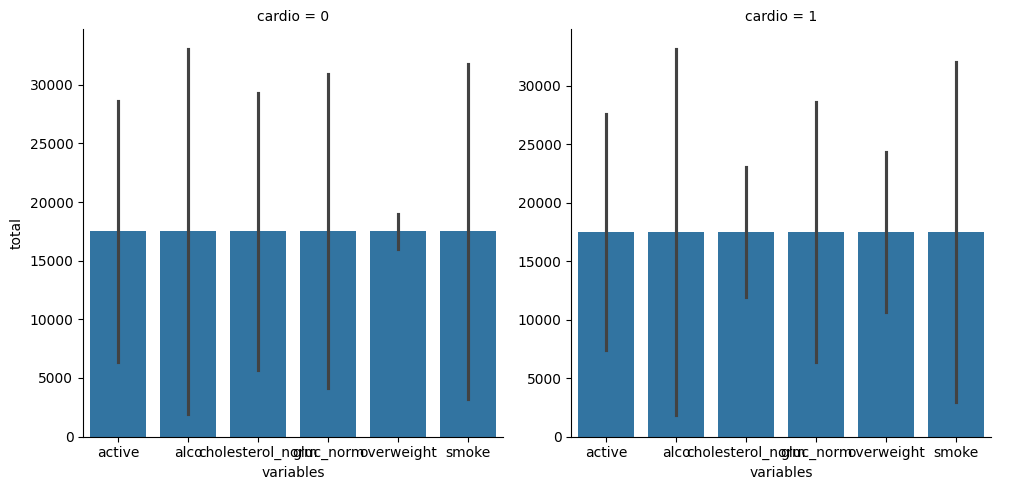

In [145]:
fig = plt.Figure(figsize= (18, 14))
sn.catplot(data = df_grouped_by_cardio, x = 'variables', y = 'total', col = 'cardio', kind = 'bar', height= 5, aspect= 1, sharey = False)
plt.tight_layout()
plt.savefig('catplot.png')
plt.show()

In [160]:
df = df.drop(columns = ['id'])

In [161]:
df

,age,sex,height,weight,ap_hi,ap_lo,smoke,alco,active,cardio,BMI,overweight,cholesterol_norm,gluc_norm
0,18393,2,168,62.0,110,80,0,0,1,0,22.0,0,0,0
1,20228,1,156,85.0,140,90,0,0,1,1,34.9,1,1,0
2,18857,1,165,64.0,130,70,0,0,0,1,23.5,0,1,0
3,17623,2,169,82.0,150,100,0,0,1,1,28.7,1,0,0
4,17474,1,156,56.0,100,60,0,0,0,0,23.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,19240,2,168,76.0,120,80,1,0,1,0,26.9,1,0,0
69996,22601,1,158,126.0,140,90,0,0,1,1,50.5,1,1,1
69997,19066,2,183,105.0,180,90,0,1,0,1,31.4,1,1,0
69998,22431,1,163,72.0,135,80,0,0,0,1,27.1,1,0,1


In [165]:
df = df[df['ap_lo'] <= df['ap_hi']]
df

,age,sex,height,weight,ap_hi,ap_lo,smoke,alco,active,cardio,BMI,overweight,cholesterol_norm,gluc_norm
0,18393,2,168,62.0,110,80,0,0,1,0,22.0,0,0,0
1,20228,1,156,85.0,140,90,0,0,1,1,34.9,1,1,0
2,18857,1,165,64.0,130,70,0,0,0,1,23.5,0,1,0
3,17623,2,169,82.0,150,100,0,0,1,1,28.7,1,0,0
4,17474,1,156,56.0,100,60,0,0,0,0,23.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,19240,2,168,76.0,120,80,1,0,1,0,26.9,1,0,0
69996,22601,1,158,126.0,140,90,0,0,1,1,50.5,1,1,1
69997,19066,2,183,105.0,180,90,0,1,0,1,31.4,1,1,0
69998,22431,1,163,72.0,135,80,0,0,0,1,27.1,1,0,1


In [ ]:
df = df[(df['height'] >= df['height'].quantile(0.025)) & (df['height'] <= df['height'].quantile(0.975))]   # height

In [172]:
df = df[(df['weight'] >= df['weight'].quantile(0.025)) & (df['weight'] <= df['weight'].quantile(0.975))]

In [175]:
corr = df.corr()

In [176]:
mask = np.triu(np.ones_like(corr, dtype=bool))

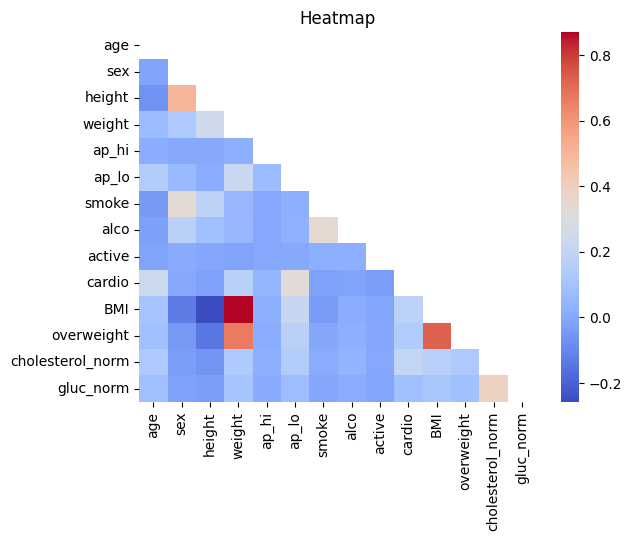

In [181]:
fig = plt.Figure(figsize = (8, 4))
sn.heatmap(corr, fmt= '.2f', cmap = 'coolwarm', mask = mask)
plt.title('Heatmap')
plt.savefig('Heatmap')
plt.show()

In [ ]:
df['']